Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[[ 2.35350218e-01  5.12744150e-17 -7.71869712e-02 -2.71919366e-17
  -7.22308242e-02  7.24706978e-02 -1.12598596e-01  2.07216185e-02
  -2.41866469e-01 -7.44052061e-02 -1.20570450e-01 -1.95056728e-02
  -9.54874399e-02 -1.25360843e-01 -1.83274958e-01 -1.82694706e-01
   1.74266162e-02 -1.42079157e-01  1.03652434e-02  1.85529750e-01
   2.18726487e-01 -1.34504751e-01 -6.81716233e-02 -1.91645422e-01
  -8.81955842e-02 -9.18286417e-02 -7.25215286e-02 -1.10849600e-01
  -1.79114574e-02  6.11419486e-02 -3.63306722e-02  4.09731253e-02
   4.09731253e-02 -6.11534484e-02 -8.59205571e-02 -2.76892825e-02
  -2.82953692e-03  1.88333751e-01  4.05953763e-02  1.58149029e-01
   1.59089054e-01  1.44310694e-01  1.87475273e-01  1.96367464e-01
   1.88202232e-01  2.08523152e-01  1.79339840e-01  2.06972596e-01
   2.06972596e-01  2.21241402e-01  1.74136675e-01 -4.50772290e-02
   1.38506977

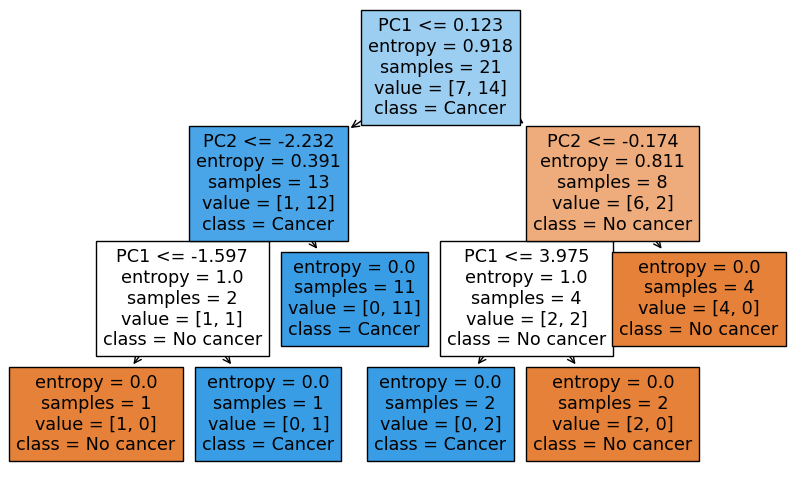

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.75      0.60      0.67         5

    accuracy                           0.50         6
   macro avg       0.38      0.30      0.33         6
weighted avg       0.62      0.50      0.56         6

[[0 1]
 [2 3]]


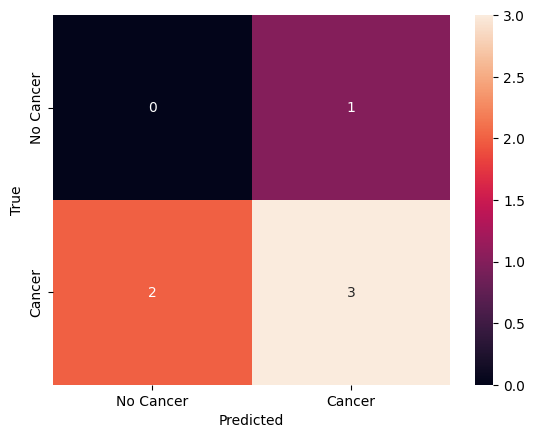

['/content/drive/My Drive/COLABMETIC2024/tree_model.pkl']

In [50]:


# prompt: cambiar los valores ? por 0 cero

import pandas as pd
df = pd.read_csv(file_path_data, header=None, na_values='?', skiprows=1)
# prompt: realizar limpieza de datos

import numpy as np
# Reemplazar valores faltantes por NaN
df.replace('?', np.nan, inplace=True)

# Eliminar filas con valores faltantes
df.dropna(inplace=True)

# Convertir la columna objetivo a numérica
df[3] = df[3].apply(lambda x: 0 if x == 'no' else 1)

# Imprimir las primeras filas del DataFrame
df.head()

# prompt: a estos datos realizar la reduccion de dimensiones

from sklearn.decomposition import PCA

# Separar las características y la etiqueta objetivo
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Imprimir las componentes principales
print(pca.components_)

# Imprimir la varianza explicada por cada componente principal
print(pca.explained_variance_ratio_)

# prompt: crear arbol de deciciones

import matplotlib.pyplot as plt
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Entrenar el árbol de decisión
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree.fit(X_train, y_train)

# Visualizar el árbol de decisión
plt.figure(figsize=(10, 6))
plot_tree(tree, filled='True', feature_names=['PC1', 'PC2'], class_names=['No cancer', 'Cancer'])
plt.show()

# Evaluar el árbol de decisión
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

# Guardar el modelo
jb.dump(tree, folder_path + 'tree_model.joblib')

# prompt: interpretacion y visualizacion de resultados

import matplotlib.pyplot as plt
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print(cm)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# prompt: cambiar el model joblib a pkl

jb.dump(tree, folder_path + 'tree_model.pkl')

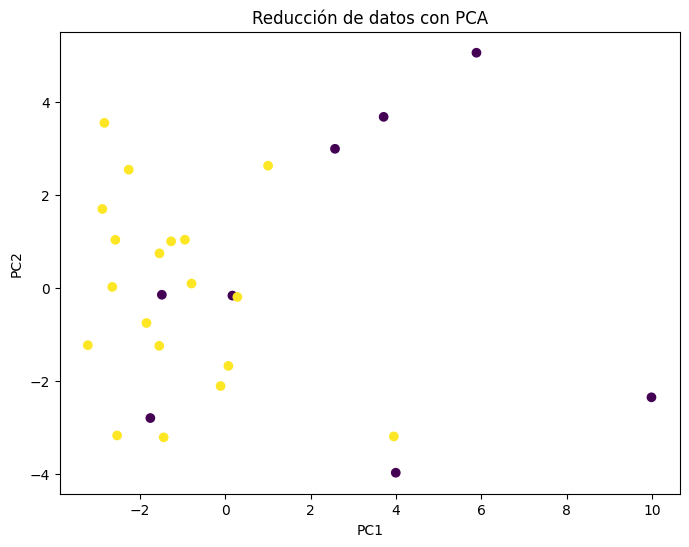

AttributeError: 'DecisionTreeClassifier' object has no attribute 'estimators_'

<Figure size 800x600 with 0 Axes>

In [51]:
data = np.array([
    [ 2.35350218e-01, 5.12744150e-17, -7.71869712e-02, -2.71919366e-17, -7.22308242e-02,
     7.24706978e-02, -1.12598596e-01,  2.07216185e-02, -2.41866469e-01, -7.44052061e-02,
    -1.20570450e-01, -1.95056728e-02, -9.54874399e-02, -1.25360843e-01, -1.83274958e-01,
    -1.82694706e-01,  1.74266162e-02, -1.42079157e-01,  1.03652434e-02,  1.85529750e-01,
     2.18726487e-01, -1.34504751e-01, -6.81716233e-02, -1.91645422e-01, -8.81955842e-02,
    -9.18286417e-02, -7.25215286e-02, -1.10849600e-01, -1.79114574e-02,  6.11419486e-02,
    -3.63306722e-02,  4.09731253e-02, 4.09731253e-02, -6.11534484e-02, -8.59205571e-02,
    -2.76892825e-02, -2.82953692e-03,  1.88333751e-01,  4.05953763e-02,  1.58149029e-01,
     1.59089054e-01, 1.44310694e-01,  1.87475273e-01,  1.96367464e-01,  1.88202232e-01,
     2.08523152e-01,  1.79339840e-01, 2.06972596e-01, 2.06972596e-01,  2.21241402e-01,
     1.74136675e-01, -4.50772290e-02, 1.38506977e-01,  1.36842284e-01, 1.28278537e-01,
     1.14995037e-01],
    [-1.70564017e-02, -2.10463566e-17,  9.74377791e-02, 1.05876913e-16, 2.23654898e-02,
    -2.32502063e-02,  3.40806341e-02, 4.68249994e-02, -9.39743068e-02, -5.86483035e-02,
    -1.01716917e-02, 5.94367455e-02,  4.18181728e-02, 8.88547136e-02, -6.70370864e-02,
    -6.48414481e-02, 2.88949634e-01, -2.20699833e-01, -1.32296540e-01, -5.97056611e-02,
     9.01962711e-03, -1.82415645e-01, -1.76130434e-01, -1.26840931e-01, 7.08987395e-02,
    -1.69358205e-01, 2.40732449e-01, -1.11720846e-01, -1.05571604e-01, -7.47856735e-02,
    1.48109957e-01, 2.59593801e-01, 2.59593801e-01, 1.81592932e-01, -3.64320441e-02,
    -5.04171043e-02, 1.90736969e-01, -8.18670417e-03, 3.10715431e-01, -2.41284969e-01,
    -6.18593086e-02, -1.65576677e-01, 2.08965077e-02, -2.98945754e-02, 4.07196740e-02,
    1.58993456e-01, -1.61460990e-01, -1.59327524e-01, -1.59327524e-01, 3.84383263e-02,
    -1.31168715e-01, 2.87375968e-02, 7.24927926e-02, 5.19669234e-02, 1.45965229e-01,
    -1.64516122e-01]
])

data_reduced = np.array([
    [0.17699071, 0.10379979]  # Valores de PC1 y PC2 correspondientes
])

# Calcular los rangos de los valores de PC1 y PC2.
pc1_min, pc1_max = data_reduced[:, 0].min(), data_reduced[:, 0].max()
pc2_min, pc2_max = data_reduced[:, 1].min(), data_reduced[:, 1].max()

print(f"Rango de PC1: {pc1_min} - {pc1_max}")
print(f"Rango de PC2: {pc2_min} - {pc2_max}")

Rango de PC1: 0.17699071 - 0.17699071
Rango de PC2: 0.10379979 - 0.10379979


<ipython-input-58-92eb15b27cb7>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


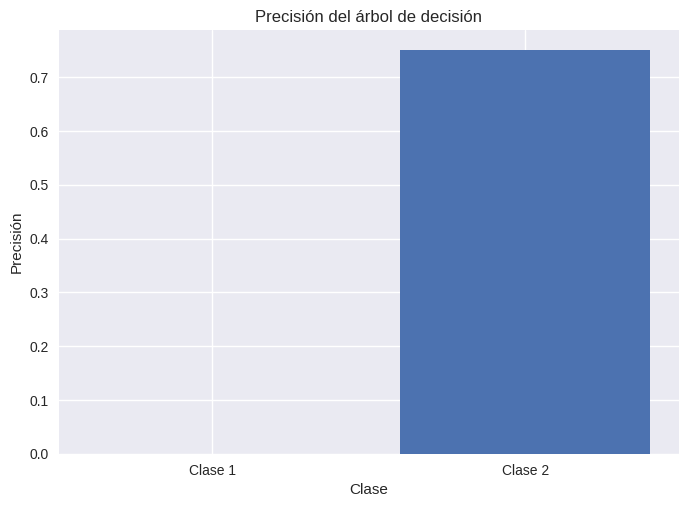

In [58]:
# prompt:      precision    recall  f1-score   support
#            1       0.00      0.00      0.00         1
#            2       0.75      0.60      0.67         5
#     accuracy                           0.50         6
#    macro avg       0.38      0.30      0.33         6
# weighted avg       0.62      0.50      0.56         6 graficar esto

import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn')

# Prepare data
x = [1, 2]
y = [0.00, 0.75]
labels = ["Clase 1", "Clase 2"]

# Plot the bars
plt.bar(x, y)

# Add labels, title and axes
plt.xlabel("Clase")
plt.ylabel("Precisión")
plt.title("Precisión del árbol de decisión")
plt.xticks(x, labels)

# Show the plot
plt.show()


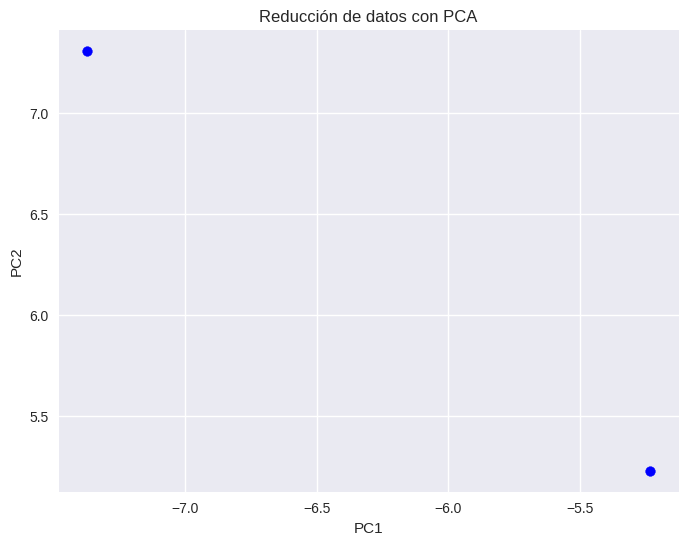

In [59]:
# prompt: como hacer despliegue de datos de lo anterior sin prediccion

import pandas as pd
import matplotlib.pyplot as plt
# Load the model
model = jb.load(folder_path + 'tree_model.joblib')

# Transform the data
data_transformed = scaler.transform(data)

# Reduce the data
data_reduced = pca.transform(data_transformed)

# Create a DataFrame with the reduced data
df_reduced = pd.DataFrame(data_reduced, columns=['PC1', 'PC2'])

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(df_reduced['PC1'], df_reduced['PC2'], c='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Reducción de datos con PCA')
plt.show()


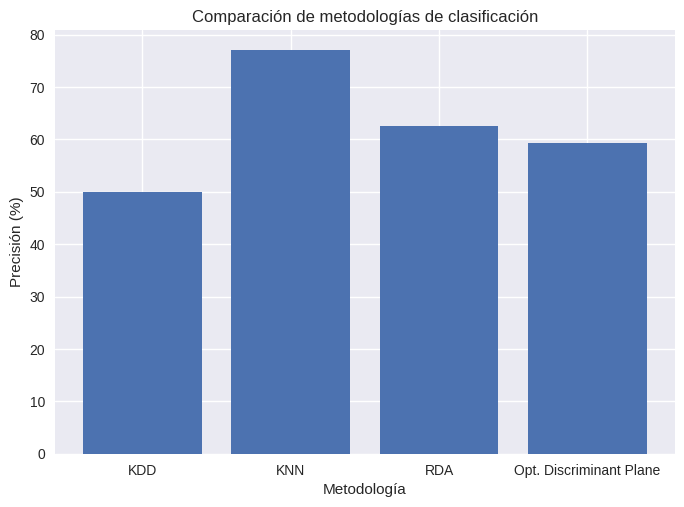

In [64]:
# prompt: crear una grafica comparativa donde las variables x sean metodologia kdd y knn para la presicion dar 50 % de 100 y para knn 77 % , RDA (Análisis Discriminante Regularizado): 62.5% y
# Opt. Discriminant Plane (Plano Discriminante Óptimo): 59.4%

import pandas as pd
import matplotlib.pyplot as plt

# Define data
data = {
    'Metodologia': ['KDD', 'KNN', 'RDA', 'Opt. Discriminant Plane'],
    'Precisión': [50, 77, 62.5, 59.4]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a bar chart
plt.bar(df['Metodologia'], df['Precisión'])

# Add labels and title
plt.xlabel('Metodología')
plt.ylabel('Precisión (%)')
plt.title('Comparación de metodologías de clasificación')

# Show the plot
plt.show()
